In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
excel_file = pd.ExcelFile("/content/TableauSalesData.xlsx")
Sales_data = excel_file.parse("Orders")

In [ ]:
print(Sales_data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [ ]:
Category = Sales_data['Category'].unique()
print(Category)

['Furniture' 'Technology' 'Office Supplies']


In [ ]:
SubCat = Sales_data['Sub-Category'].unique()
print(SubCat)

['Bookcases' 'Phones' 'Storage' 'Accessories' 'Tables' 'Binders' 'Copiers'
 'Art' 'Furnishings' 'Paper' 'Envelopes' 'Chairs' 'Fasteners' 'Appliances'
 'Labels' 'Machines' 'Supplies']


In [ ]:
SubCat_Profits = Sales_data[["Sub-Category", "Profit", "Sales"]].groupby("Sub-Category").sum().sort_values("Profit", ascending= False)
print(SubCat_Profits)

                  Profit        Sales
Sub-Category                         
Copiers       55617.8249  149528.0300
Phones        44515.7306  330007.0540
Accessories   41936.6357  167380.3180
Paper         34053.5693   78479.2060
Binders       30221.7633  203412.7330
Chairs        26590.1663  328449.1030
Storage       21278.8264  223843.6080
Appliances    18138.0054  107532.1610
Furnishings   13059.1436   91705.1640
Envelopes      6964.1767   16476.4020
Art            6527.7870   27118.7920
Labels         5546.2540   12486.3120
Machines       3384.7569  189238.6310
Fasteners       949.5182    3024.2800
Supplies      -1189.0995   46673.5380
Bookcases     -3472.5560  114879.9963
Tables       -17725.4811  206965.5320


In [ ]:
Just_Copiers = Sales_data.loc[Sales_data["Sub-Category"] == "Copiers"]
print(Just_Copiers)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
8       2898  US-2016-164630 2016-01-04 2016-01-09  Standard Class   
367      754  CA-2016-110499 2016-04-07 2016-04-09     First Class   
649     6426  CA-2016-143714 2016-05-23 2016-05-27  Standard Class   
705     1234  CA-2016-153682 2016-05-30 2016-06-01     First Class   
932     7473  CA-2016-139997 2016-07-01 2016-07-03     First Class   
...      ...             ...        ...        ...             ...   
9622    5773  CA-2019-158939 2019-11-26 2019-12-01  Standard Class   
9748    4073  CA-2019-156104 2019-12-06 2019-12-08    Second Class   
9780    4201  CA-2019-143105 2019-12-10 2019-12-10        Same Day   
9932    8991  US-2019-128587 2019-12-24 2019-12-30  Standard Class   
9941    6063  CA-2019-111780 2019-12-25 2019-12-30    Second Class   

     Customer ID       Customer Name      Segment        Country  \
8       EB-13975          Erica Bern    Corporate  United States   
367     YC-21895      Y

In [ ]:
Copiers_Prof_Sales = Just_Copiers[["Product Name", "Profit", "Sales"]].groupby("Product Name").sum().sort_values("Profit")
print(Copiers_Prof_Sales)

                                                        Profit      Sales
Product Name                                                             
Hewlett Packard 310 Color Digital Copier              839.9720   4199.860
Brother DCP1000 Digital 3 in 1 Multifunction Ma...   1154.9615   4859.838
Canon PC-428 Personal Copier                         1469.9265   4119.794
Sharp 1540cs Digital Laser Copier                    1649.9700   4399.920
Canon Image Class D660 Copier                        1691.9718   3959.934
Canon PC1080F Personal Copier                        1973.9671   5999.900
Sharp AL-1530CS Digital Copier                       2064.9587   6399.872
Canon PC940 Copier                                   2092.4535   5669.874
Canon Imageclass D680 Copier / Fax                   2799.9600   8959.872
Hewlett Packard 610 Color Digital Copier / Printer   3124.9375   8899.822
Canon PC1060 Personal Laser Copier                   4570.9347  11619.834
Hewlett Packard LaserJet 3310 Copier  

In [ ]:
Copier_segment = Just_Copiers[["Segment", "Profit", "Sales"]].groupby("Segment").sum()
print(Copier_segment)

                 Profit      Sales
Segment                           
Consumer     24083.7106  69819.070
Corporate    18990.2789  46829.386
Home Office  12543.8354  32879.574


In [ ]:
Copier_region = Just_Copiers[["Region", "Profit", "Sales"]].groupby("Region").sum().sort_values("Profit")
print(Copier_region)

             Profit      Sales
Region                        
South     3658.9067   9299.756
Central  15608.8413  37259.570
East     17022.8418  53219.462
West     19327.2351  49749.242


In [ ]:
Copiers_only = Just_Copiers[["Segment", "Region", "Profit", "Sales"]]
Just_south = Copiers_only.loc[Copiers_only["Region"] == "South"]
Just_south_profit = Just_south[["Segment", "Profit", "Sales"]].groupby("Segment").sum()
print(Just_south_profit)

              Profit     Sales
Segment                       
Consumer   1783.9452  4439.868
Corporate  1874.9615  4859.888


In [ ]:
Copier_seg_region= Just_Copiers[["Segment", "Region", "Profit", "Sales"]].groupby(["Segment", "Region"]).sum()
print(Copier_seg_region)

                         Profit      Sales
Segment     Region                        
Consumer    Central   1482.9616   4519.884
            East      8657.9325  30399.706
            South     1783.9452   4439.868
            West     12158.8713  30459.612
Corporate   Central  12789.9043  29679.742
            East      1134.9765   4219.914
            South     1874.9615   4859.888
            West      3190.4366   8069.842
Home Office Central   1335.9754   3059.944
            East      7229.9328  18599.842
            West      3977.9272  11219.788


In [ ]:
Copiers_only = Just_Copiers[["Segment", "Region", "Profit", "Sales"]]
Just_east = Copiers_only.loc[Copiers_only["Region"] == "East"]
Just_east_profit = Just_east[["Segment", "Profit", "Sales"]].groupby("Segment").sum()
print(Just_east_profit)

                Profit      Sales
Segment                          
Consumer     8657.9325  30399.706
Corporate    1134.9765   4219.914
Home Office  7229.9328  18599.842


In [ ]:
Copiers_only = Just_Copiers[["Segment", "Region", "Profit", ]]
Just_east = Copiers_only.loc[Copiers_only["Region"] == "East"]
Just_east_profit = Just_east[["Segment", "Profit",]].groupby("Segment").sum()
print(Just_east_profit)

                Profit
Segment               
Consumer     8657.9325
Corporate    1134.9765
Home Office  7229.9328


<ipython-input-23-db934c10ee71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barchart_east = sns.barplot(x="Segment", y="Profit", data=Just_east_profit, palette= ["blue", "red", "red"])
<ipython-input-23-db934c10ee71>:2: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  barchart_east = sns.barplot(x="Segment", y="Profit", data=Just_east_profit, palette= ["blue", "red", "red"])


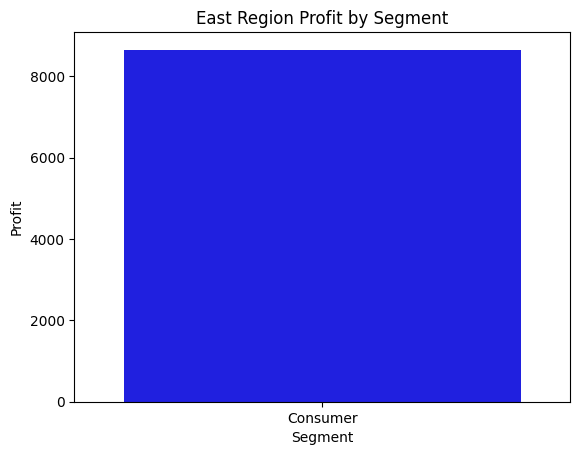

In [ ]:
Just_east_profit = Just_east[["Segment", "Profit",]].groupby("Segment").sum()
barchart_east = sns.barplot(x="Segment", y="Profit", data=Just_east_profit, palette= ["blue", "red", "red"])
barchart_east.set_title("East Region Profit by Segment")
plt.show()

In [ ]:
Copiers_only = Just_Copiers[["Segment", "Region", "Profit", "Sales"]]
Just_west = Copiers_only.loc[Copiers_only["Region"] == "West"]
Just_west_profit = Just_west[["Segment", "Profit", "Sales"]].groupby("Segment").sum()
print(Just_west_profit)

                 Profit      Sales
Segment                           
Consumer     12158.8713  30459.612
Corporate     3190.4366   8069.842
Home Office   3977.9272  11219.788


<ipython-input-21-de42b50b8181>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barchart_west = sns.barplot(x="Segment", y="Profit", data=Just_west_profit, palette= ["blue", "red", "red"])
<ipython-input-21-de42b50b8181>:2: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  barchart_west = sns.barplot(x="Segment", y="Profit", data=Just_west_profit, palette= ["blue", "red", "red"])


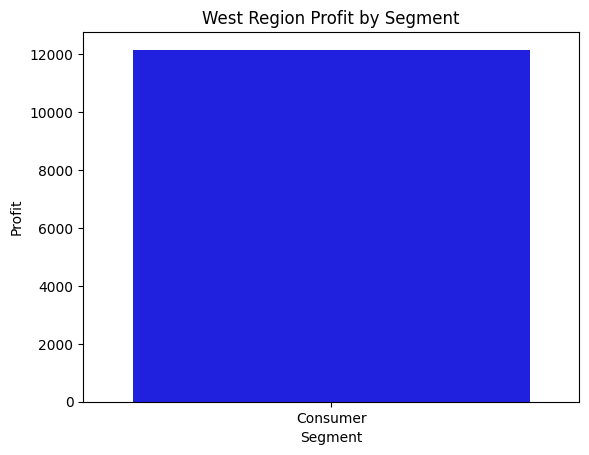

In [ ]:
Just_west_profit = Just_west[["Segment", "Profit",]].groupby("Segment").sum()
barchart_west = sns.barplot(x="Segment", y="Profit", data=Just_west_profit, palette= ["blue", "red", "red"])
barchart_west.set_title("West Region Profit by Segment")
plt.show()

                                                       Profit      Sales  \
Product Name                                                               
Hewlett Packard 310 Color Digital Copier             209.9930   1259.958   
Brother DCP1000 Digital 3 in 1 Multifunction Ma...   224.9925   1199.960   
Hewlett Packard LaserJet 3310 Copier                 335.9944    959.984   
Canon PC-428 Personal Copier                         377.9811   1119.944   
Hewlett Packard 610 Color Digital Copier / Printer   449.9910    999.980   
Canon PC1080F Personal Copier                        701.9883   1799.970   
Sharp AL-1530CS Digital Copier                       869.9826   2399.952   
Canon PC1060 Personal Laser Copier                  2267.9676   6719.904   
Canon imageCLASS 2200 Advanced Copier               6719.9808  13999.960   

                                                    Discount  
Product Name                                                  
Hewlett Packard 310 Color Digital Cop

<ipython-input-20-db0d56678969>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barchart_west = sns.barplot(x="Product Name", y="Profit", data=Just_west_product_name, palette=["red","red","red", "red", "red", "red","red", "blue", "blue"])


Text(0.5, 1.0, 'West Region Profit by Product Name (Consumer Segment)')

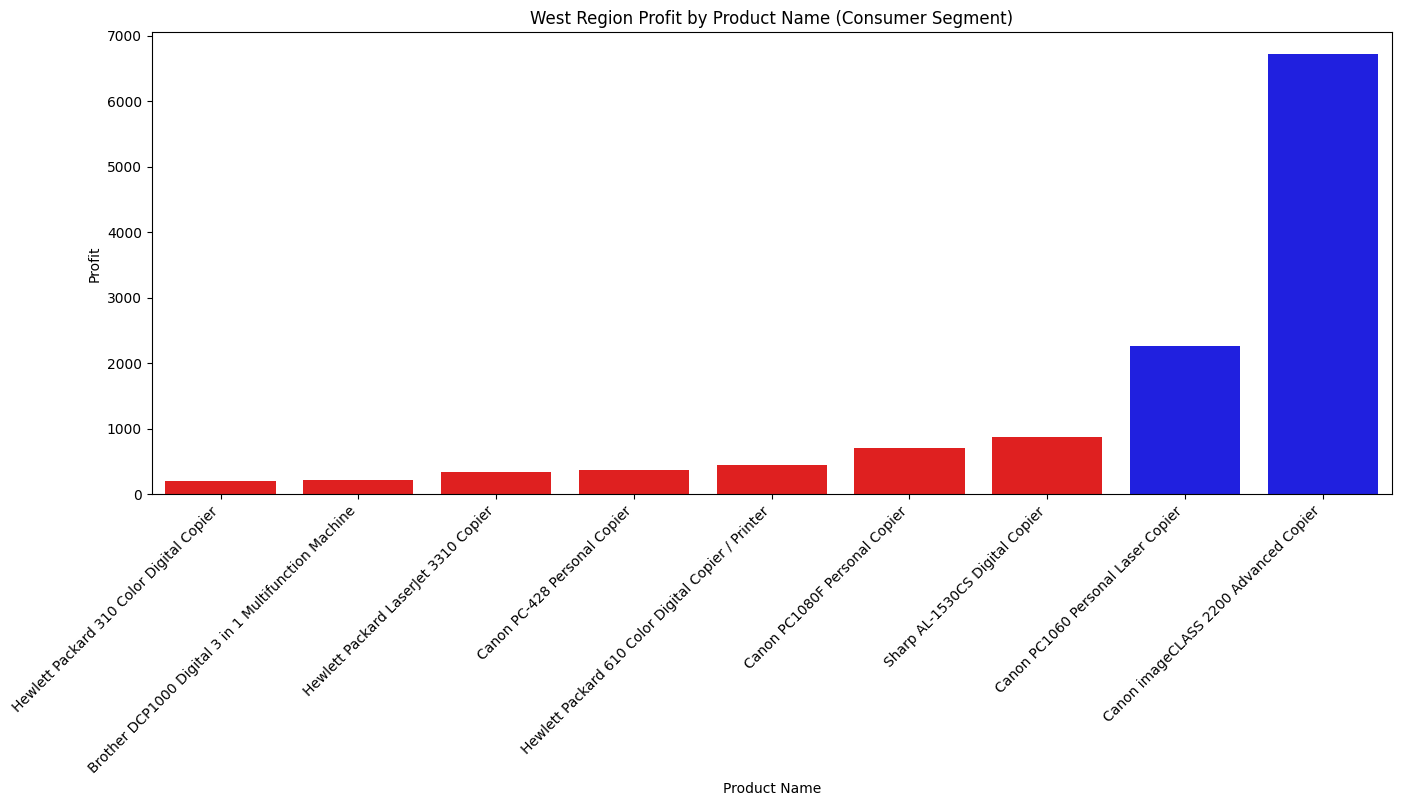

In [ ]:
Copiers_only = Just_Copiers[["Segment", "Region", "Product Name","Profit", "Sales", "Discount"]]
Just_west = Copiers_only.loc[(Copiers_only["Region"] == "West") &  (Copiers_only["Segment"] == "Consumer" )]
Just_west_product_name = Just_west[["Product Name","Profit", "Sales", "Discount"]].groupby("Product Name").sum().sort_values("Profit")
print(Just_west_product_name)
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45, ha='right', fontsize=10)
barchart_west = sns.barplot(x="Product Name", y="Profit", data=Just_west_product_name, palette=["red","red","red", "red", "red", "red","red", "blue", "blue"])
barchart_west.set_title("West Region Profit by Product Name (Consumer Segment)")


In [ ]:
Copiers_only = Just_Copiers[["Segment", "Region", "Product Name","Profit", "Discount"]]
Just_west = Copiers_only.loc[(Copiers_only["Region"] == "West")]
Just_west_product_name = Just_west[["Product Name","Profit", "Discount"]].groupby("Product Name").sum().sort_values("Discount")
print(Just_west_product_name)

                                                       Profit  Discount
Product Name                                                           
Canon Image Class D660 Copier                       1379.9770       0.0
Canon PC1080F Personal Copier                        701.9883       0.0
Canon PC940 Copier                                  1480.4671       0.0
Canon imageCLASS 2200 Advanced Copier               6719.9808       0.0
Canon Imageclass D680 Copier / Fax                  1049.9850       0.2
Hewlett Packard 610 Color Digital Copier / Printer   824.9835       0.2
Brother DCP1000 Digital 3 in 1 Multifunction Ma...   314.9895       0.4
Canon PC-428 Personal Copier                         377.9811       0.4
Hewlett Packard 310 Color Digital Copier             659.9780       0.4
Sharp 1540cs Digital Laser Copier                    494.9910       0.4
Sharp AL-1530CS Digital Copier                       869.9826       0.4
Canon PC1060 Personal Laser Copier                  2267.9676   

                                             Profit      Sales  Discount
Product Name                                                            
Hewlett Packard 310 Color Digital Copier    59.9980    479.984       0.2
Canon PC-428 Personal Copier                69.9965    599.970       0.4
Canon PC940 Copier                         125.9972   1079.976       0.4
Canon Imageclass D680 Copier / Fax         174.9975    559.992       0.2
Hewlett Packard LaserJet 3310 Copier       431.9928   3239.946       0.8
Sharp 1540cs Digital Laser Copier          439.9920   1539.972       0.6
Sharp AL-1530CS Digital Copier            1194.9761   3999.920       0.6
Canon imageCLASS 2200 Advanced Copier     6159.9824  18899.946       0.4


<ipython-input-19-8df77c759be5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barchart_east = sns.barplot(x="Product Name", y="Profit", data=Just_east_product_name, palette=["red","red","red", "red", "red", "red", "blue", "blue"])


Text(0.5, 1.0, 'East Region Profit by Product Name (Consumer Segment)')

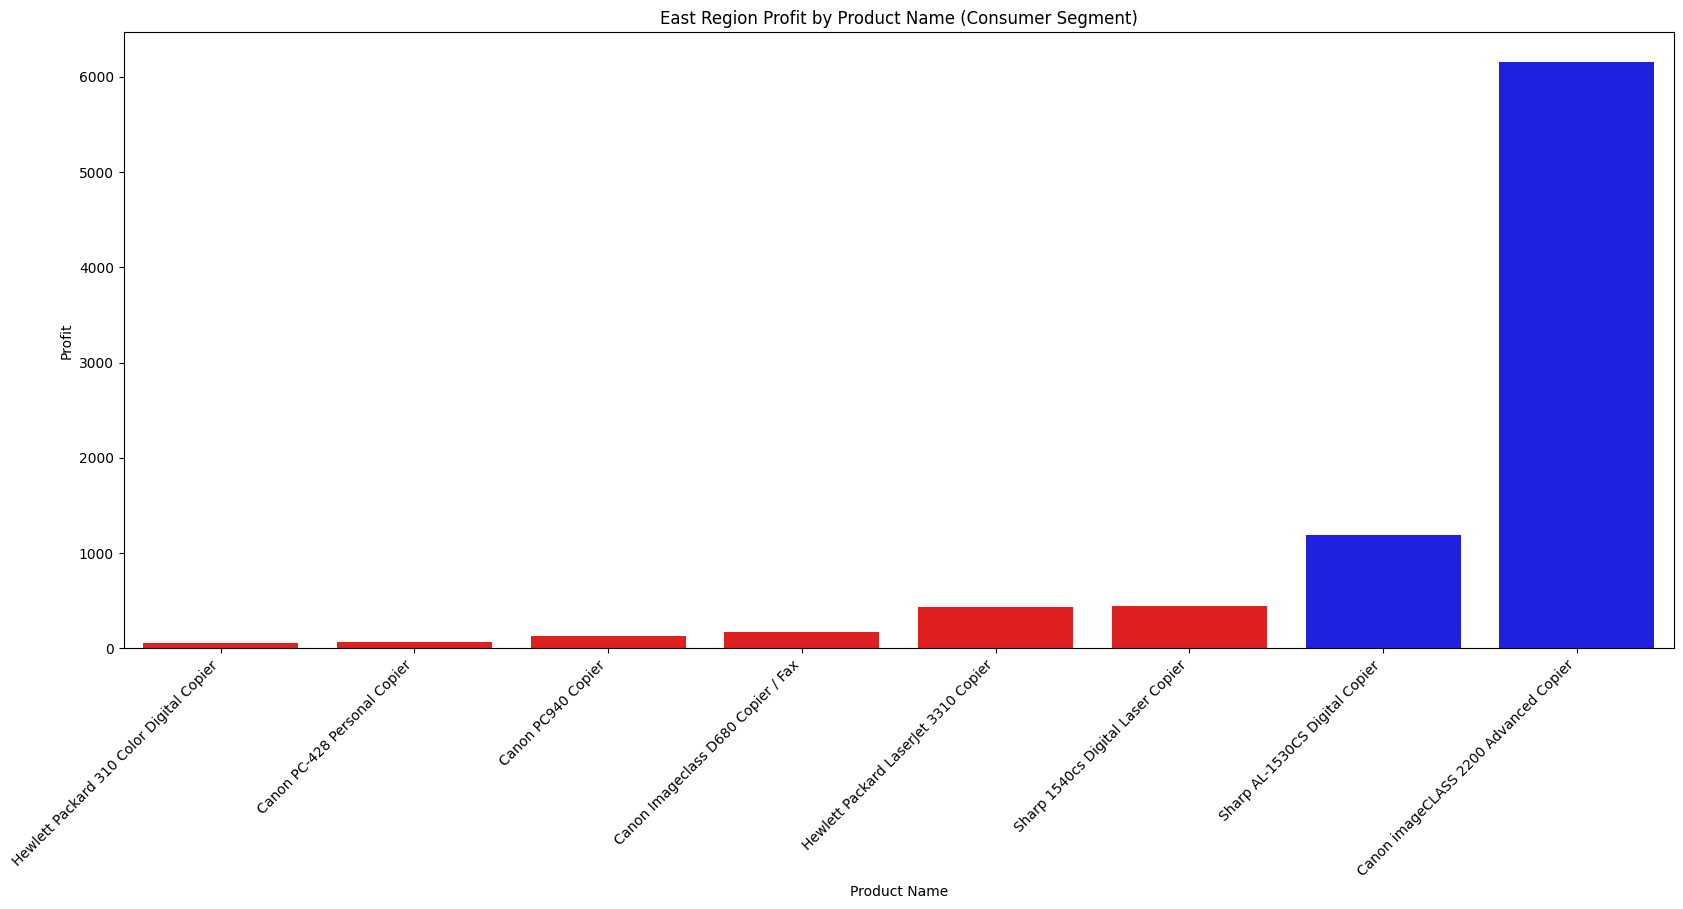

In [ ]:
Copiers_only = Just_Copiers[["Segment", "Region", "Product Name","Profit", "Sales", "Discount"]]
Just_east = Copiers_only.loc[(Copiers_only["Region"] == "East") &  (Copiers_only["Segment"] == "Consumer" )]
Just_east_product_name = Just_east[["Product Name","Profit", "Sales", "Discount"]].groupby("Product Name").sum().sort_values("Profit")
print(Just_east_product_name)
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha='right', fontsize=10)
barchart_east = sns.barplot(x="Product Name", y="Profit", data=Just_east_product_name, palette=["red","red","red", "red", "red", "red", "blue", "blue"])
barchart_east.set_title("East Region Profit by Product Name (Consumer Segment)")

In [ ]:
Just_copiers_discount = Just_Copiers[["Product Name", "Discount", "Profit", ]]
average_discount = Just_copiers_discount.groupby("Product Name").mean().sort_values("Discount", ascending=False)
print(average_discount)

                                                    Discount       Profit
Product Name                                                             
Sharp AL-1530CS Digital Copier                      0.250000   516.239675
Canon PC-428 Personal Copier                        0.200000   244.987750
Canon PC940 Copier                                  0.200000   697.484500
Canon Imageclass D680 Copier / Fax                  0.200000   559.992000
Hewlett Packard LaserJet 3310 Copier                0.200000   872.985450
Sharp 1540cs Digital Laser Copier                   0.171429   235.710000
Canon PC1060 Personal Laser Copier                  0.150000  1142.733675
Brother DCP1000 Digital 3 in 1 Multifunction Ma...  0.142857   164.994500
Hewlett Packard 610 Color Digital Copier / Printer  0.142857   446.419643
Hewlett Packard 310 Color Digital Copier            0.133333   139.995333
Canon imageCLASS 2200 Advanced Copier               0.120000  5039.985600
Canon Image Class D660 Copier         

In [ ]:
East_Consumer = Just_east[["Product Name", "Discount", "Profit"]]
average_discount_east = East_Consumer.groupby("Product Name").mean().sort_values("Discount", ascending=False)
print(average_discount_east)

KeyError: "['Product Name', 'Discount'] not in index"

In [ ]:
West_Consumer = Just_west[["Product Name", "Discount", "Profit"]]
average_discount_west = West_Consumer.groupby("Product Name").mean().sort_values("Discount", ascending=False)
print(average_discount_west)

KeyError: "['Product Name', 'Discount'] not in index"

In [ ]:
Just_Hewlet = Just_Copiers.loc[Just_Copiers["Product Name"] == "Hewlett Packard 310 Color Digital Copier"]
Just_Hewlet = Just_Hewlet[[ "Profit", "Sales", "Discount"]].sort_values("Profit")
print(Just_Hewlet)

       Profit     Sales  Discount
2900   59.998   479.984       0.2
3027   59.998   479.984       0.2
8981   59.998   479.984       0.2
4064   89.997   299.990       0.0
8     119.996   959.968       0.2
932   449.985  1499.950       0.0


In [ ]:
second_worst_selling = Just_Copiers.loc[Just_Copiers["Product Name"] == "Canon PC-428 Personal Copier"]
second_worst_selling = second_worst_selling[["Profit", "Sales", "Discount"]].sort_values("Profit")
print(second_worst_selling)

        Profit     Sales  Discount
3904   69.9965   599.970       0.4
4339  107.9946   319.984       0.2
1630  161.9919   479.976       0.2
9303  161.9919   479.976       0.2
8202  215.9892   639.968       0.2
1470  751.9624  1599.920       0.0


In [ ]:
Best_Selling = Just_Copiers.loc[Just_Copiers["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]
Best_Selling = Best_Selling[["Profit", "Sales", "Discount"]].sort_values("Profit")
print(Best_Selling)

         Profit      Sales  Discount
649   1119.9968   8399.976       0.4
4889  3919.9888  11199.968       0.2
5231  5039.9856  10499.970       0.0
3014  6719.9808  13999.960       0.0
1680  8399.9760  17499.950       0.0


In [ ]:
Years_copiers = Just_Copiers.copy()
Years_copiers["Year"] = Years_copiers["Order Date"].dt.year
print(Years_copiers)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
8       2898  US-2016-164630 2016-01-04 2016-01-09  Standard Class   
367      754  CA-2016-110499 2016-04-07 2016-04-09     First Class   
649     6426  CA-2016-143714 2016-05-23 2016-05-27  Standard Class   
705     1234  CA-2016-153682 2016-05-30 2016-06-01     First Class   
932     7473  CA-2016-139997 2016-07-01 2016-07-03     First Class   
...      ...             ...        ...        ...             ...   
9622    5773  CA-2019-158939 2019-11-26 2019-12-01  Standard Class   
9748    4073  CA-2019-156104 2019-12-06 2019-12-08    Second Class   
9780    4201  CA-2019-143105 2019-12-10 2019-12-10        Same Day   
9932    8991  US-2019-128587 2019-12-24 2019-12-30  Standard Class   
9941    6063  CA-2019-111780 2019-12-25 2019-12-30    Second Class   

     Customer ID       Customer Name      Segment        Country  \
8       EB-13975          Erica Bern    Corporate  United States   
367     YC-21895      Y

In [ ]:
Yearly_copier_sales = Years_copiers[["Year","Profit", "Sales"]].groupby("Year").sum()
print(Yearly_copier_sales)

          Profit      Sales
Year                       
2016  17742.7926  49599.410
2017  25031.7902  62899.388
2018   2912.9433  10849.782
2019   9930.2988  26179.450


In [ ]:
Yearly_product_sales = Years_copiers[["Year", "Product Name", "Profit", "Sales", "Discount"]].groupby(["Year", "Product Name"]).agg({"Profit": "sum", "Discount": "mean"})
print(Yearly_product_sales)

                                                             Profit  Discount
Year Product Name                                                            
2016 Brother DCP1000 Digital 3 in 1 Multifunction Ma...     89.9970  0.200000
     Canon Imageclass D680 Copier / Fax                     69.9990  0.400000
     Canon PC-428 Personal Copier                          913.9543  0.100000
     Canon PC1060 Personal Laser Copier                   1889.9730  0.200000
     Canon imageCLASS 2200 Advanced Copier                9519.9728  0.200000
     Hewlett Packard 310 Color Digital Copier              569.9810  0.100000
     Hewlett Packard 610 Color Digital Copier / Printer   1724.9655  0.066667
     Hewlett Packard LaserJet 3310 Copier                 2783.9536  0.200000
     Sharp AL-1530CS Digital Copier                        179.9964  0.400000
2017 Brother DCP1000 Digital 3 in 1 Multifunction Ma...     89.9970  0.200000
     Canon Image Class D660 Copier                        1691.9

In [ ]:
Canon_2017_sales = Yearly_product_sales.loc[(2017, 'Canon imageCLASS 2200 Advanced Copier')]
print(Canon_2017_sales)

Profit      15679.955200
Discount        0.066667
Name: (2017, Canon imageCLASS 2200 Advanced Copier), dtype: float64


In [ ]:
Canon_2019_sales = Yearly_product_sales.loc[(2016,'Canon imageCLASS 2200 Advanced Copier')]
print(Canon_2019_sales)

Profit      9519.9728
Discount       0.2000
Name: (2016, Canon imageCLASS 2200 Advanced Copier), dtype: float64
